# Perkenalan

---
Nama : Khalil Zufar

Batch : HCK - 020

Objective: Proyek ini bertujuan untuk memprediksi apakah suatu gambar mammogram menunjukkan tanda-tanda tumor payudara atau tidak menggunakan model Computer Vision berbasis Convolutional Neural Networks (CNN) untuk klasifikasi kanker payudara.

---

# Import Libraries

In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Load Model

In [2]:
# load model
model = load_model('model.h5')

1/1 [==============================] - 0s 28ms/step
Prediksi: 1 - Tumor Ganas (Malignant)
Probabilitas: 0.32621467113494873
Pasien memiliki tumor ganas.


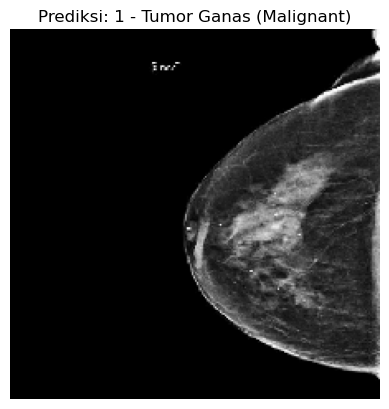

In [13]:
def inference(img_path):
    # Memuat dan memproses gambar
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocessing input untuk MobileNetV2 atau model yang Anda gunakan
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

    # Melakukan prediksi
    prediction = model.predict(img_array)
    probability = prediction[0][0]

    # Mendefinisikan kelas berdasarkan ambang batas probabilitas
    if probability >= 0.3:
        predicted_class = '1 - Tumor Ganas (Malignant)'  # Malignant
        patient_status = 'Pasien memiliki tumor ganas.'  # Informasi tambahan
    else:
        predicted_class = '0 - Tumor Jinak (Benign)'  # Benign
        patient_status = 'Pasien memiliki tumor jinak.'  # Informasi tambahan

    # Mengembalikan hasil prediksi
    return {'class': predicted_class, 'probability': probability, 'status': patient_status}

def plot_prediction(img_path, result):
    # Memuat gambar untuk ditampilkan
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Menampilkan gambar dan prediksi
    plt.imshow(img)
    plt.title(f"Prediksi: {result['class']}")
    plt.axis('off') 
    plt.show()

image_path = 'breastcancer.jpg'
result = inference(image_path)

# Menampilkan hasil prediksi beserta informasi pasien
print(f"Prediksi: {result['class']}")
print(f"Probabilitas: {result['probability']}")
print(result['status'])

# Menampilkan gambar dengan hasil prediksi
plot_prediction(image_path, result)

1/1 [==============================] - 0s 32ms/step
Prediksi: 1 - Tumor Ganas (Malignant)
Probabilitas: 0.3205884099006653
Pasien memiliki tumor ganas.


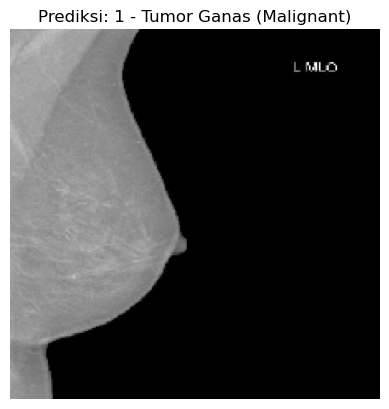

In [15]:
image_path = 'breastnocancer.jpg'
result = inference(image_path)

# Menampilkan hasil prediksi beserta informasi pasien
print(f"Prediksi: {result['class']}")
print(f"Probabilitas: {result['probability']}")
print(result['status'])

# Menampilkan gambar dengan hasil prediksi
plot_prediction(image_path, result)

- Pada gambar yang memiliki tumor, model berhasil mengidentifikasi sebagai tumor ganas (malignant) dengan probabilitas sekitar 32.62%. Namun, probabilitas ini masih di bawah ambang batas yang telah ditentukan (0.3), menunjukkan bahwa model mungkin tidak sepenuhnya yakin dengan prediksi tersebut.
- Pada gambar yang tidak menunjukkan tumor, model salah mengklasifikasikan sebagai tumor ganas. Ini mencerminkan adanya tantangan dalam mengidentifikasi gambar yang benar-benar tidak memiliki tumor, yang dapat berakibat fatal dalam konteks diagnosa medis.